In [1]:
import networkx as nx

In [2]:
G=nx.Graph()  #Base class for undirected graphs.

In [3]:
G.add_node(1)  #Add a single node

In [4]:
G.add_nodes_from([2,3])  #Add multiple nodes.

In [5]:
G.add_edge(1,2) #Add an edge between u and v.
G.add_edge(2,3)
G.add_edge(3,1)

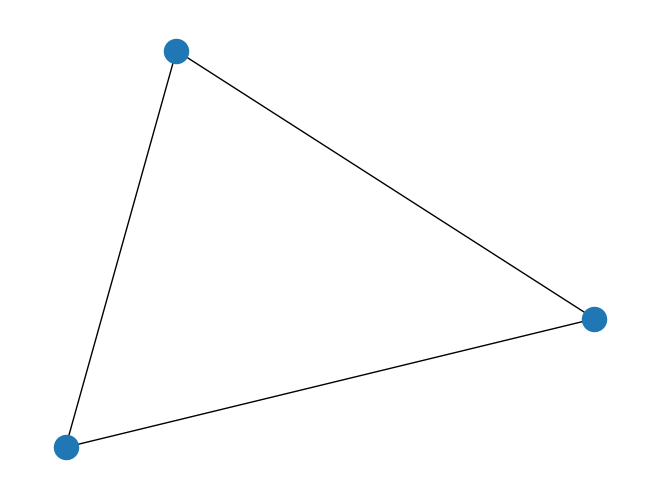

In [6]:
nx.draw(G)  #Draw the graph G with Matplotlib.

In [7]:
G.number_of_nodes()

3

In [8]:
G.number_of_edges()

3

In [9]:
G.edges

EdgeView([(1, 2), (1, 3), (2, 3)])

In [10]:
G.nodes

NodeView((1, 2, 3))

In [11]:
# G.remove_nodes_from([1,2])

In [12]:
G.is_directed()

False

In [13]:
G.is_multigraph()

False

In [14]:
from networkx.readwrite import json_graph  #Generate and parse JSON serializable data for NetworkX graphs.

In [15]:
json_data=json_graph.node_link_data(G)

In [16]:
json_data

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 1}, {'id': 2}, {'id': 3}],
 'links': [{'source': 1, 'target': 2},
  {'source': 1, 'target': 3},
  {'source': 2, 'target': 3}]}

In [17]:
json_data_to_graph=json_graph.node_link_graph(json_data)

In [18]:
json_data_to_graph

In [19]:
G.clear()  #Remove all nodes and edges from the graph.

[(1, 2), (1, 3)]
[1, 2, 3]


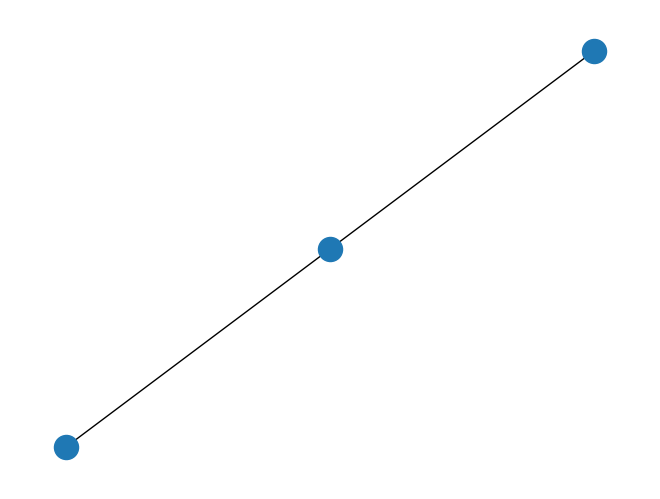

In [20]:
G.add_edges_from([(1,2),(1,3)])
print(G.edges())
print(G.nodes())
nx.draw(G)

In [21]:
G.add_node('code')  #--> adds the node 'code'

In [22]:
G.add_nodes_from('code') #-->adds 4 nodes: 'c' 'o' 'd' 'e'

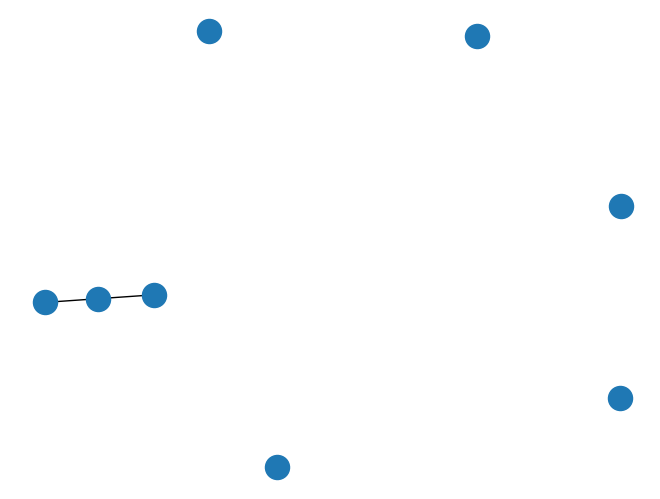

In [23]:
nx.draw(G)

In [24]:
G.order()  #Returns the number of nodes in the graph.

8

In [25]:
from networkx.classes.function import density
density(G)  #Returns the density of a graph.

0.07142857142857142

In [26]:
from networkx.classes.function import degree,degree_histogram
print(degree(G))  #Returns a degree view of single node or of nbunch of nodes.
degree_histogram(G) #Returns a list of the frequency of each degree value.

[(1, 2), (2, 1), (3, 1), ('code', 0), ('c', 0), ('o', 0), ('d', 0), ('e', 0)]


[5, 2, 1]

In [27]:
from networkx.classes.function import neighbors,all_neighbors
print(list(neighbors(G,1)))  # Returns a list of nodes connected to node n.
list(all_neighbors(G,'c'))  #Returns all of the neighbors of a node in the graph.

[2, 3]


[]

In [28]:
for node in G.nodes():
  print(node,list(G.neighbors(node)))

1 [2, 3]
2 [1]
3 [1]
code []
c []
o []
d []
e []


False
False
False


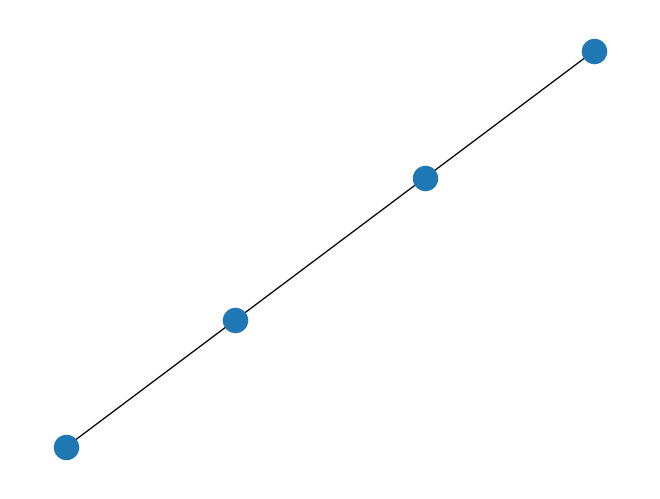

In [29]:
G=nx.path_graph(4) #Returns the Path graph
print(nx.is_weighted(G))
print(nx.is_weighted(G, (2, 3)))
print(nx.is_directed(G))
nx.draw(G)

Directed Graph

True
True


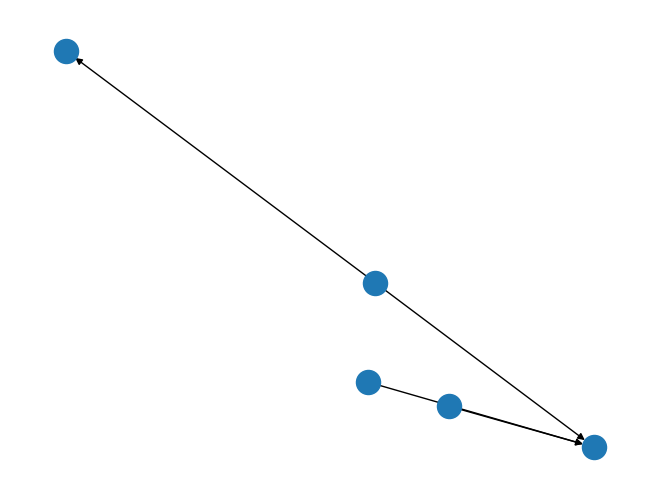

In [30]:
G=nx.DiGraph()
G.add_edge(1,2,weight=1)
G.add_edge(3,2,weight=5)
G.add_edge(6, 8, weight=25)
G.add_edge(6, 2, weight=50)
nx.draw(G)
print(nx.is_weighted(G))
print(nx.is_directed(G))

In [31]:
print([n for n in G.neighbors(1)])

[2]


In [32]:
for node in G.nodes():
  print(node, list(G.neighbors(node)))

1 [2]
2 []
3 [2]
6 [8, 2]
8 []


In [33]:
A=nx.adjacency_matrix(G) #Returns adjacency matrix of G.
print(A)

  (0, 1)	1
  (2, 1)	5
  (3, 1)	50
  (3, 4)	25


In [34]:
print(A.todense()) #Prints the values to a stream, or to sys.stdout by default.

[[ 0  1  0  0  0]
 [ 0  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0 50  0  0 25]
 [ 0  0  0  0  0]]


In [35]:
A.diagonal()  #returns the kth diagonal of the array.

array([0, 0, 0, 0, 0], dtype=int32)

Multi-Directed Graph

[(0, 1, 0), (1, 0, 0), (2, 2, 0), (2, 2, 1)]
[0, 1, 2]


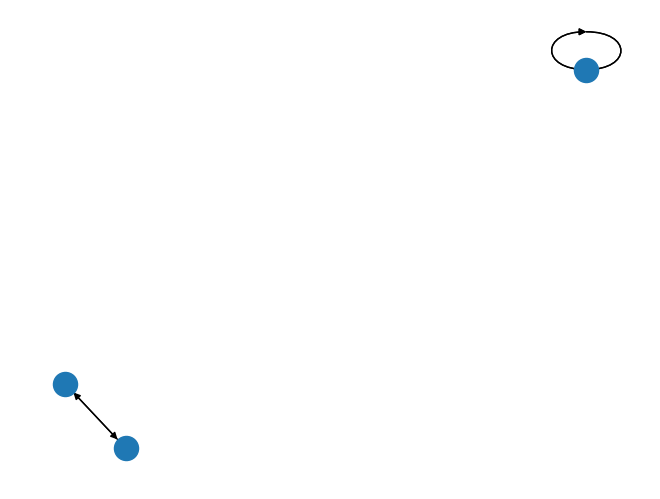

In [36]:
G=nx.MultiDiGraph()
G.add_edge(0,1,weight=2)
G.add_edge(1,0)
G.add_edge(2,2,weight=3)
G.add_edge(2,2)
nx.draw(G)
print(G.edges)
print(G.nodes)

[[ 0 10  0  0]
 [10  0  1  0]
 [ 0  1  0  3]
 [ 0  0  3  0]]
[[ 0.  1.  0.  0.]
 [ 1.  0.  5.  0.]
 [ 0.  5.  0. -4.]
 [ 0.  0. -4.  0.]]


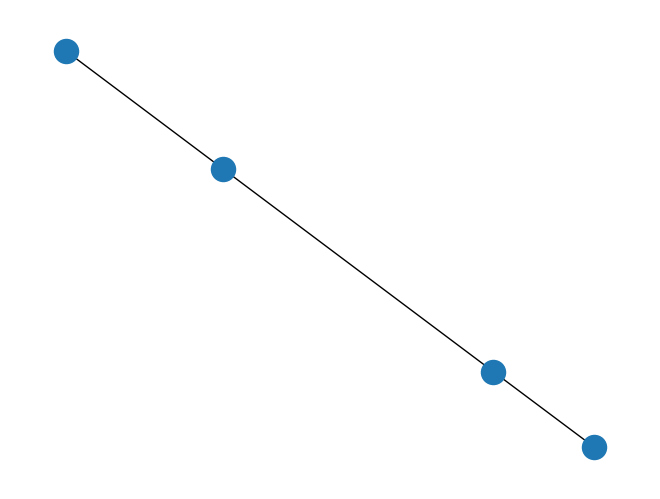

In [37]:
import numpy as np
G=nx.Graph()
G.add_edge(0,1,weight=10)
G.add_edge(1,2,cost=5)
G.add_edge(2,3,weight=3,cost=-4.0)
dtype = np.dtype([("weight", int), ("cost", float)])
A = nx.to_numpy_array(G, dtype=dtype, weight=None)
print(A["weight"])
print(A["cost"])
nx.draw(G)

{0: {1: {'weight': 1.0}, 2: {'weight': 1.0}}, 1: {0: {'weight': 1.0}, 2: {'weight': 2.0}}, 2: {1: {'weight': 2.0}, 0: {'weight': 1.0}}}


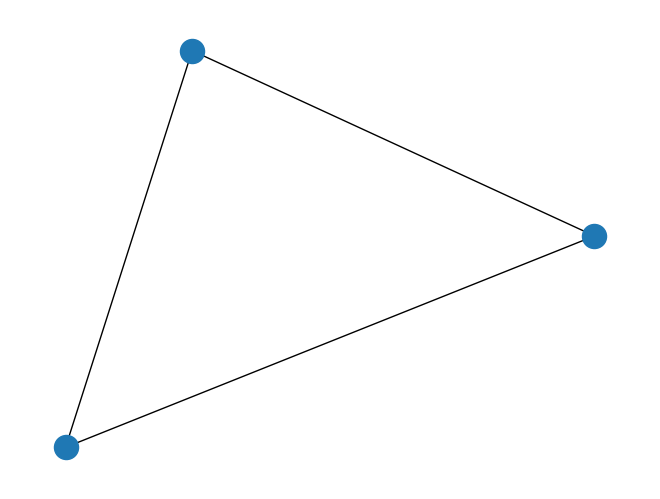

In [38]:
G=nx.Graph()
G.add_edges_from([(0,1,{'weight':1.0}),(1,2,{'weight':2.0}),(2,0,{'weight':1.0}),])
nx.draw(G)
d=nx.to_dict_of_dicts(G)
print(d)

{0: {1: {'a': {'weight': 1.0}, 'b': {'weight': 5.0}}}, 1: {0: {'a': {'weight': 1.0}, 'b': {'weight': 5.0}}}}


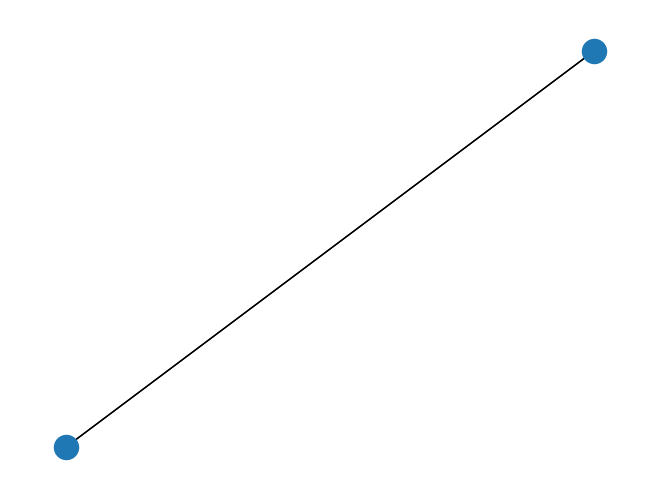

In [39]:
G=nx.MultiGraph()
G.add_edge(0,1,key='a',weight=1.0)
G.add_edge(0,1,key='b',weight=5.0)
nx.draw(G)
d=nx.to_dict_of_dicts(G)
print(d)

  source target  cost  weight
0      A      B     1       7
1      C      E     9      10

  source target  cost  weight
0      B      A     1       7
1      E      C     9      10

  source target  cost  weight
0      A      B     1       7
1      C      E     9      10



,source,target,cost,weight
0,A,B,1,7
1,C,E,9,10


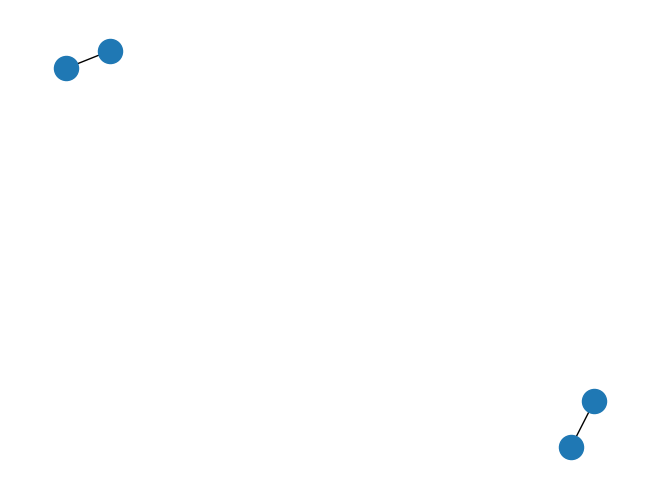

In [40]:
G=nx.Graph([("A", "B", {"cost": 1, "weight": 7}),("C", "E", {"cost": 9, "weight": 10}),])
nx.draw(G)
df = nx.to_pandas_edgelist(G)
print(df)
print()
df = nx.to_pandas_edgelist(G, nodelist=["B", "E"])
print(df)
print()
df = nx.to_pandas_edgelist(G, nodelist=["A", "C"])
print(df)
print()
df[["source", "target", "cost", "weight"]]

Sudoku Graph


81
810
[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


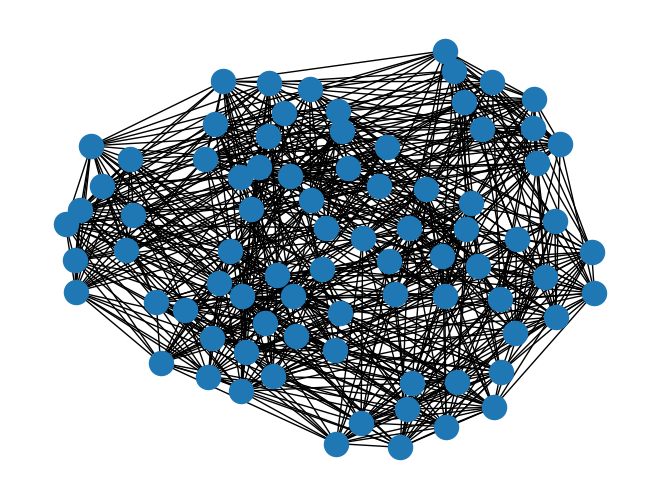

In [41]:
G=nx.sudoku_graph()  # default is 3x3 = 9 nodes
print(G.number_of_nodes())
print(G.number_of_edges())
A=nx.adjacency_matrix(G)
print(A.todense())
nx.draw(G)

In [42]:
print(G.is_directed())
print(G.is_multigraph())

False
False


[[0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0]
 [1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0]
 [1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0]
 [1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1]
 [1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0]
 [1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0]
 [0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0]
 [0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0]
 [0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0]
 [0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1]
 [0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1]
 [1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1]
 [0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1]
 [0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1]
 [0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0]]


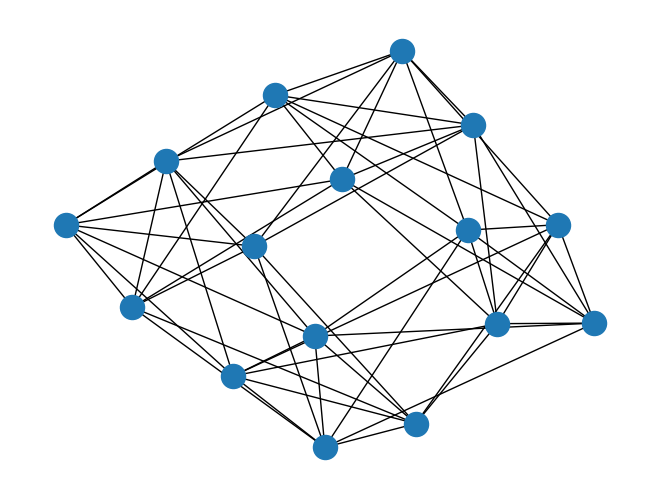

In [43]:
# Creating 2x2
G=nx.sudoku_graph(2)
G.number_of_nodes()
G.number_of_edges()
A=nx.adjacency_matrix(G)
print(A.todense())
nx.draw(G)

Grid Graph


  (0, 1)	1
  (0, 2)	1
  (0, 6)	1
  (1, 0)	1
  (1, 3)	1
  (1, 7)	1
  (2, 0)	1
  (2, 3)	1
  (2, 4)	1
  (2, 8)	1
  (3, 1)	1
  (3, 2)	1
  (3, 5)	1
  (3, 9)	1
  (4, 2)	1
  (4, 5)	1
  (4, 10)	1
  (5, 3)	1
  (5, 4)	1
  (5, 11)	1
  (6, 0)	1
  (6, 7)	1
  (6, 8)	1
  (6, 12)	1
  (7, 1)	1
  :	:
  (16, 22)	1
  (17, 11)	1
  (17, 15)	1
  (17, 16)	1
  (17, 23)	1
  (18, 12)	1
  (18, 19)	1
  (18, 20)	1
  (19, 13)	1
  (19, 18)	1
  (19, 21)	1
  (20, 14)	1
  (20, 18)	1
  (20, 21)	1
  (20, 22)	1
  (21, 15)	1
  (21, 19)	1
  (21, 20)	1
  (21, 23)	1
  (22, 16)	1
  (22, 20)	1
  (22, 23)	1
  (23, 17)	1
  (23, 21)	1
  (23, 22)	1


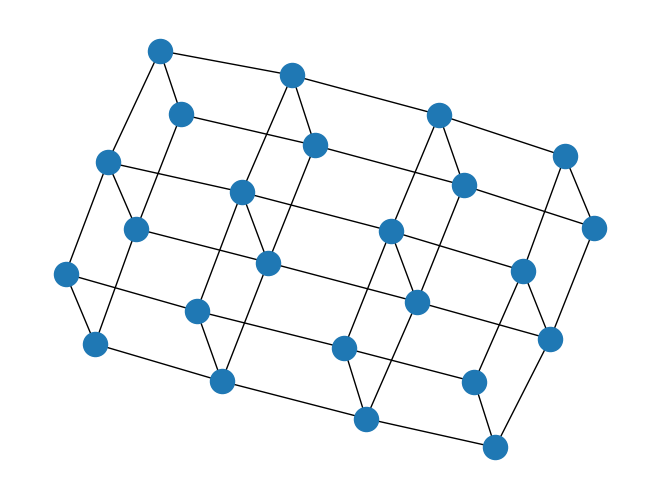

In [44]:
G=nx.grid_graph(dim=(2, 3, 4))
nx.draw(G)
A=nx.adjacency_matrix(G)
print(A)